## Exercise 3 - Barrier Method

*Barrier method example.* Consider the simple problem

$$
\begin{array}{ll}
\displaystyle \min_{x} & x^2+1 \\ 
\text{s.t. } & 2\le x \le 4
\end{array}
$$

which has feasible set $[2, 4]$ and optimal point $x^*= 2$. Plot $f_0$, and $f_0 + \frac{1}{t}\phi$
, for several
values of $t > 0$, versus $x$. Indicate $x^*(t)$.

### Solution Exercise 3

The figure below shows the function $f_0 + \frac{1}{t} \phi$ for $f_0(x) = x^2 + 1$, with barrier function $\phi(x) = - \log(x - 2) - \log(4 - x)$, for $t = 10^{-1}, 10^{-0.8}, \dots , 10^{0.8}, 10$. The inner curve corresponds to $t = 0.1$, and the outer curve corresponds to $t = 10$. The objective function is shown as a dashed curve. The values $x^*(t)$ are indicated with red dots. The optimal point $x^*$ is indicated with a black square.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

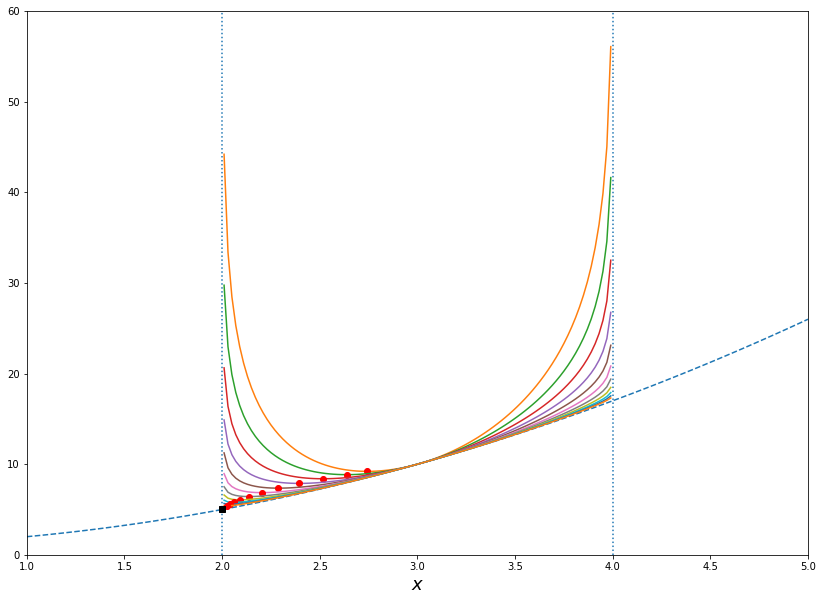

In [ ]:
M=11
eps = 0.01
x = cp.Variable()

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(10)

plt.plot(np.linspace(1, 5, 100),[x*x +1 for x in np.linspace(1, 5, 100)],'--')
for j in range(M):
  t=np.power(10,-1+j/(M-1)*2)
  plt.plot(np.linspace(2+eps, 4-eps, 100),[x*x +1 + 1/t * (-np.log(x-2)-np.log(4-x)) for x in np.linspace(2+eps, 4-eps, 100)])
  prob = cp.Problem(cp.Minimize(cp.power(x,2)+1-1/t*(cp.log(x-2)+cp.log(4-x))),[])
  prob.solve()
  plt.plot(x.value,prob.value,"ro")

plt.axvline(x=2,linestyle=':')
plt.axvline(x=4,linestyle=':')
plt.plot(2,5,"ks")
plt.xlabel("$x$",fontsize="18")
plt.ylim(0,60)
plt.xlim(1,5)
plt.show()